In [13]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


## processing the DEM-RSTM

In [1]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt
from numpy import gradient

with rasterio.open(r"C:\Users\mun93\Downloads\EURO_EDM\euro-dem-tif\data\eurodem\DE_clipped_raster.tif") as rstm_src:
    elevation  = rstm_src.read(1)
    nodata_value = rstm_src.nodata
    transform = rstm_src.transform  # To preserve spatial information
    print(rstm_src.profile)
    print(elevation.min(), elevation.max(), nodata_value)
    print(rstm_src.crs)


{'driver': 'GTiff', 'dtype': 'int16', 'nodata': 32767.0, 'width': 16463, 'height': 13873, 'count': 1, 'crs': CRS.from_wkt('GEOGCS["ETRS89",DATUM["European_Terrestrial_Reference_System_1989",SPHEROID["GRS 1980",6378137,298.257222101004,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6258"]],PRIMEM["Greenwich",0],UNIT["Arcsecond",4.84813681109536E-06],AXIS["Latitude",NORTH],AXIS["Longitude",EAST]]'), 'transform': Affine(2.0, 0.0, 21156.148893600155,
       0.0, -2.0, 197917.84721960023), 'blockxsize': 16463, 'blockysize': 1, 'tiled': False, 'interleave': 'band'}
-244 32767 32767.0
GEOGCS["ETRS89",DATUM["European_Terrestrial_Reference_System_1989",SPHEROID["GRS 1980",6378137,298.257222101004,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6258"]],PRIMEM["Greenwich",0],UNIT["Arcsecond",4.84813681109536E-06],AXIS["Latitude",NORTH],AXIS["Longitude",EAST]]


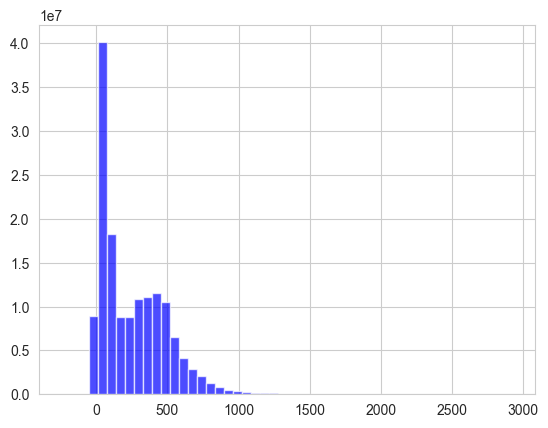

In [4]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Flatten the raster data to 1D
with rasterio.open(r"C:\Users\mun93\Downloads\EURO_EDM\euro-dem-tif\data\eurodem\DE_clipped_raster.tif") as rstm_src:
    data = rstm_src.read(1)
    # Remove NaN or NoData values (if any)
    data = data[(~np.isnan(data)) & (data != rstm_src.nodata)]

    # Plot the histogram using Matplotlib
    plt.hist(data, bins=50, color='blue', alpha=0.7)



## filtering elevation

In [5]:
import rasterio
from rasterio.warp import reproject, Resampling

with rasterio.open(r"C:\Users\mun93\Downloads\EURO_EDM\euro-dem-tif\data\eurodem\DE_clipped_raster.tif") as src:
    elevation = src.read(1)
    profile = src.profile
    elevation_float = elevation.astype(np.float32)
    print(elevation_float.min(), elevation_float.max(), nodata_value)
    mask = (elevation_float <= 1200) & (elevation_float  != src.nodata)
    filtered_elevation = np.where(mask, elevation_float ,np.nan)

    print(np.nanmean(filtered_elevation))

# Save filtered slope
    profile.update(dtype=np.float32, nodata=np.nan)
    with rasterio.open(r"C:\Users\mun93\Downloads\DE_clipped_elevation.tif", 'w', **profile) as dst:

        dst.write(filtered_elevation, 1)

    #print(dst.read(1))



-244.0 32767.0 32767.0
247.87654


In [6]:
print(filtered_elevation.min(),filtered_elevation.max())

nan nan


In [7]:
with rasterio.open(r"C:\Users\mun93\Downloads\DE_clipped_elevation.tif") as dst:
    print(dst.profile)


{'driver': 'GTiff', 'dtype': 'float32', 'nodata': nan, 'width': 16463, 'height': 13873, 'count': 1, 'crs': CRS.from_wkt('GEOGCS["ETRS89",DATUM["European_Terrestrial_Reference_System_1989",SPHEROID["GRS 1980",6378137,298.257222101004,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6258"]],PRIMEM["Greenwich",0],UNIT["Arcsecond",4.84813681109536E-06],AXIS["Latitude",NORTH],AXIS["Longitude",EAST]]'), 'transform': Affine(2.0, 0.0, 21156.148893600155,
       0.0, -2.0, 197917.84721960023), 'blockxsize': 16463, 'blockysize': 1, 'tiled': False, 'interleave': 'band'}


{'driver': 'GTiff', 'dtype': 'float32', 'nodata': nan, 'width': 16463, 'height': 13873, 'count': 1, 'crs': CRS.from_wkt('GEOGCS["ETRS89",DATUM["European_Terrestrial_Reference_System_1989",SPHEROID["GRS 1980",6378137,298.257222101004,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6258"]],PRIMEM["Greenwich",0],UNIT["Arcsecond",4.84813681109536E-06],AXIS["Latitude",NORTH],AXIS["Longitude",EAST]]'), 'transform': Affine(2.0, 0.0, 21156.148893600155,
       0.0, -2.0, 197917.84721960023), 'blockxsize': 16463, 'blockysize': 1, 'tiled': False, 'interleave': 'band'}
Min: -244.0
Max: 1200.0
Unique values: [-244. -241. -240. ... 1199. 1200.   nan]


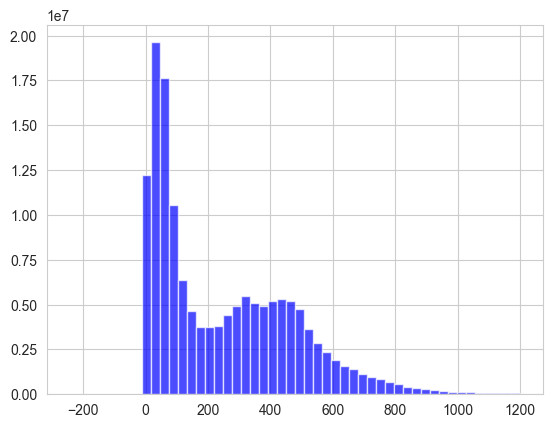

In [8]:
import pandas as pd
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Flatten the raster data to 1D
with rasterio.open(r"C:\Users\mun93\Downloads\DE_clipped_elevation.tif") as flit_rstm_src:
    print(flit_rstm_src.profile)
    data = flit_rstm_src.read(1)
    data = flit_rstm_src.read(1)
    print("Min:", np.nanmin(data))
    print("Max:", np.nanmax(data))
    print("Unique values:", np.unique(data))  #
    # Remove NaN or NoData values (if any)
    data = data[(~np.isnan(data)) & (data != flit_rstm_src.nodata)]
    df = pd.DataFrame(data, columns=['value'])
    #Plot the histogram using Matplotlib
    plt.hist(data, bins=50, color='blue', alpha=0.7)



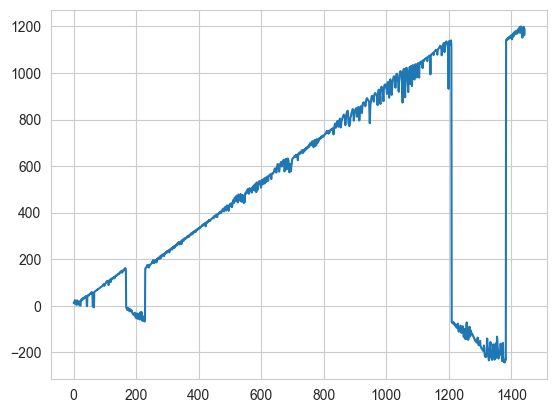

In [314]:
import matplotlib.pyplot as plt

a = df.value.unique()
b = a[a != 999999].astype('int')
plt.plot(b)

## reproject the elevation

In [11]:
import rasterio
from rasterio.warp import calculate_default_transform, reproject, Resampling
import numpy as np

# Input and output paths
input_path = r"C:\Users\mun93\Downloads\DE_clipped_elevation.tif"
output_path = r"C:\Users\mun93\Downloads\DE_clipped_elevation_WGS84.tif"

# Open the source raster
with rasterio.open(input_path) as src:
    # Read the data and metadata
    elevation = src.read(1)
    src_crs = src.crs  # Original CRS (e.g., ETRS89)
    src_nodata = src.nodata  # Original NoData value (e.g., -32768)

    # Define target CRS (WGS84)
    dst_crs = "EPSG:25832"

    # Calculate the transform for the output
    dst_transform, dst_width, dst_height = calculate_default_transform(
        src_crs, dst_crs, src.width, src.height, *src.bounds
    )

    # Create destination array (float32 to support NaN if needed)
    dst_data = np.empty((dst_height, dst_width), dtype=np.float32)

    # Reproject the data
    reproject(
        source=elevation,
        destination=dst_data,
        src_transform=src.transform,
        src_crs=src_crs,
        dst_transform=dst_transform,
        dst_crs=dst_crs,
        src_nodata=src_nodata,
        dst_nodata=np.nan,  # Use NaN for NoData in output
        resampling=Resampling.bilinear  # Best for continuous data like elevation
    )

    # Update metadata for the output file
    dst_profile = src.profile
    dst_profile.update(
        crs=dst_crs,
        transform=dst_transform,
        width=dst_width,
        height=dst_height,
        dtype=np.float32,
        nodata=np.nan
    )

    # Save the reprojected raster
    with rasterio.open(output_path, 'w', **dst_profile) as dst:
        dst.write(dst_data, 1)

print(f"Reprojected raster saved to: {output_path}")

Reprojected raster saved to: C:\Users\mun93\Downloads\DE_clipped_elevation_WGS84.tif


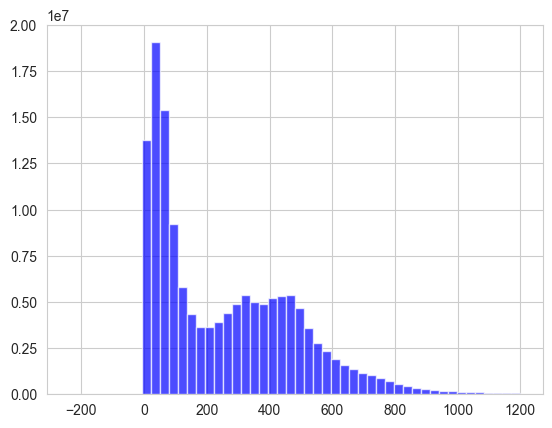

In [12]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Flatten the raster data to 1D
with rasterio.open(r"C:\Users\mun93\Downloads\DE_clipped_elevation_WGS84.tif") as elev_src:
    data = elev_src.read(1)
    # Remove NaN or NoData values (if any)
    data = data[(~np.isnan(data)) & (data != elev_src.nodata)]

    # Plot the histogram using Matplotlib
    plt.hist(data, bins=50, color='blue', alpha=0.7)



## for the report

C:\Users\mun93\anaconda3\envs\JupyterProject_3.10\lib\site-packages\matplotlib_scalebar\scalebar.py:457: UserWarning: Drawing scalebar on axes with unequal aspect ratio; either call ax.set_aspect(1) or suppress the warning with rotation='horizontal-only'.
  warnings.warn(


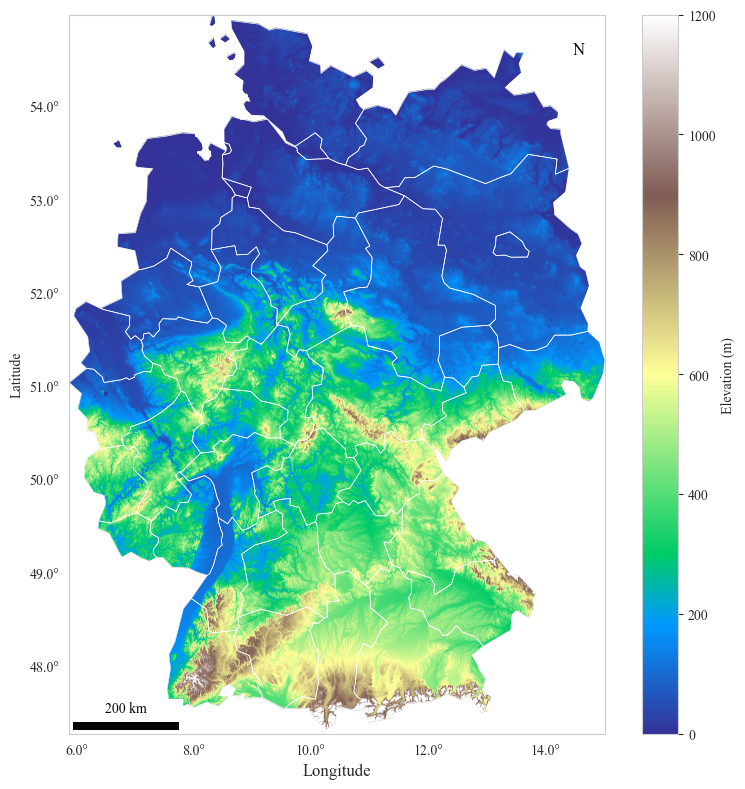

In [7]:
import rasterio
from rasterio.warp import calculate_default_transform, reproject, Resampling
from rasterio.transform import Affine
from rasterio.mask import mask
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar
import matplotlib.ticker as mticker
import os

# Set the font to Times New Roman globally
plt.rcParams['font.family'] = 'Times New Roman'

# -------------------- INPUT FILES --------------------
raster_path = r"C:\Users\mun93\Downloads\EURO_EDM\euro-dem-tif\data\eurodem\DE_clipped_raster.tif"
shapefile_path = r"C:\Users\mun93\Downloads\NUTS_RG_20M_2024_4326.shp\NUTS_RG_20M_2024_4326.shp"
reprojected_raster_path = os.path.splitext(raster_path)[0] + "_WGS84_FIXED.tif"

# -------------------- STEP 1: FIX TRANSFORM --------------------
with rasterio.open(raster_path) as src:
    # Assume original units are arcseconds (1 unit = 1 arcsec = 1/3600 degrees)
    arcsec_to_deg = 1 / 3600.0

    # Manually fix the transform
    original_transform = src.transform
    fixed_transform = Affine(
        original_transform.a * arcsec_to_deg, 0.0, original_transform.c * arcsec_to_deg,
        0.0, original_transform.e * arcsec_to_deg, original_transform.f * arcsec_to_deg
    )

    # Force correct CRS to EPSG:4326
    dst_crs = "EPSG:4326"
    transform, width, height = calculate_default_transform(
        dst_crs, dst_crs, src.width, src.height,
        *rasterio.transform.array_bounds(src.height, src.width, fixed_transform)
    )

    profile = src.profile.copy()
    profile.update({
        'crs': dst_crs,
        'transform': transform,
        'width': width,
        'height': height,
        'nodata': src.nodata,
        'dtype': src.dtypes[0]
    })

    with rasterio.open(reprojected_raster_path, 'w', **profile) as dst:
        reproject(
            source=rasterio.band(src, 1),
            destination=rasterio.band(dst, 1),
            src_transform=fixed_transform,
            src_crs=dst_crs,  # Since we fixed transform manually
            dst_transform=transform,
            dst_crs=dst_crs,
            resampling=Resampling.bilinear
        )

# -------------------- STEP 2: LOAD SHAPEFILE --------------------
germany_nuts2 = gpd.read_file(shapefile_path)
germany_nuts2 = germany_nuts2[(germany_nuts2['NUTS_ID'].str.startswith('DE')) &
                              (germany_nuts2['LEVL_CODE'] == 2)]

# -------------------- STEP 3: CLIP RASTER --------------------
with rasterio.open(reprojected_raster_path) as src:
    out_image, out_transform = mask(src, germany_nuts2.geometry, crop=True)
    out_image = np.ma.masked_equal(out_image, src.nodata)

# -------------------- STEP 4: PLOT --------------------
fig, ax = plt.subplots(figsize=(8, 8))

# Plot raster
bounds = rasterio.transform.array_bounds(out_image.shape[1], out_image.shape[2], out_transform)
extent = [bounds[0], bounds[2], bounds[1], bounds[3]]
img = ax.imshow(out_image[0], cmap='terrain', extent=extent, vmin=0, vmax=1200)
cbar = plt.colorbar(img, ax=ax, label='Elevation (m)')

# Plot shapefile
germany_nuts2.boundary.plot(ax=ax, color='white', linewidth=.5)

# Add a scale bar
scalebar = ScaleBar(111, "km", loc='lower left', scale_loc='top')
ax.add_artist(scalebar)

# Axes and layout
ax.set_xlabel("Longitude", fontsize=12)
ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{x:.1f}°"))
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda y, _: f"{y:.1f}°"))

# Add a north arrow
ax.annotate('N', xy=(0.95, 0.95), xycoords='axes fraction', fontsize=12, ha='center', va='center', color='black')

# Labels
#ax.set_title("DEM Overlay with NUTS2 Boundaries - Germany")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.tight_layout()
plt.grid(False)
plt.show()


## Calculate Slope

In [9]:
import rasterio
import numpy as np

# Open the elevation raster
with rasterio.open(r"C:\Users\mun93\Downloads\DE_clipped_elevation_WGS84.tif") as src:
    elevation = src.read(1)
    #print(np.unique(elevation))
    print(src.profile)
    #dy, dx = gradient(elevation, axis=(0, 1))
    #print(np.unique(dy), np.unique(dx))

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': nan, 'width': 13938, 'height': 17603, 'count': 1, 'crs': CRS.from_wkt('PROJCS["ETRS89 / UTM zone 32N",GEOGCS["ETRS89",DATUM["European_Terrestrial_Reference_System_1989",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6258"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4258"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",9],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","25832"]]'), 'transform': Affine(49.632364719007334, 0.0, 263757.7263242282,
       0.0, -49.632364719007334, 6108859.164609284), 'blockxsize': 13938, 'blockysize': 1, 'tiled': False, 'interleave': 'band'}


In [15]:
import rasterio
import numpy as np

# Open the elevation raster
with rasterio.open(r"C:\Users\mun93\Downloads\DE_clipped_elevation_WGS84.tif") as el_src:
    elevation = el_src.read(1)
    transform = el_src.transform
    profile = el_src.profile.copy()

    # Get pixel size in meters from transform
    pixel_x_m = transform.a
    pixel_y_m = -transform.e  # Note the sign!

    # Compute gradients
    dy, dx = np.gradient(elevation, pixel_y_m, pixel_x_m)  # dy = N-S, dx = E-W

    # Compute slope in radians
    slope_radians = np.arctan(np.sqrt(dx**2 + dy**2))

    # Convert to degrees
    slope_degrees = np.degrees(slope_radians)

    # Handle NoData if needed
    slope_degrees = np.where(np.isnan(elevation), np.nan, slope_degrees)

    # Update profile
    profile.update(dtype=rasterio.float32, nodata=np.nan)

    # Save the slope raster
    slope_path = r"C:\Users\mun93\Downloads\DE_slope_WGS84.tif"
    with rasterio.open(slope_path, 'w', **profile) as dst:
        dst.write(slope_degrees.astype(np.float32), 1)

print(f"Slope raster saved to: {slope_path}")


Slope raster saved to: C:\Users\mun93\Downloads\DE_slope_WGS84.tif


In [11]:
print(rasterio.open(r"C:\Users\mun93\Downloads\DE_slope_WGS84.tif").profile)

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': nan, 'width': 13938, 'height': 17603, 'count': 1, 'crs': CRS.from_wkt('PROJCS["ETRS89 / UTM zone 32N",GEOGCS["ETRS89",DATUM["European_Terrestrial_Reference_System_1989",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6258"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4258"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",9],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","25832"]]'), 'transform': Affine(49.632364719007334, 0.0, 263757.7263242282,
       0.0, -49.632364719007334, 6108859.164609284), 'blockxsize': 13938, 'blockysize': 1, 'tiled': False, 'interleave': 'band'}


0.0 74.072556 3.5679073


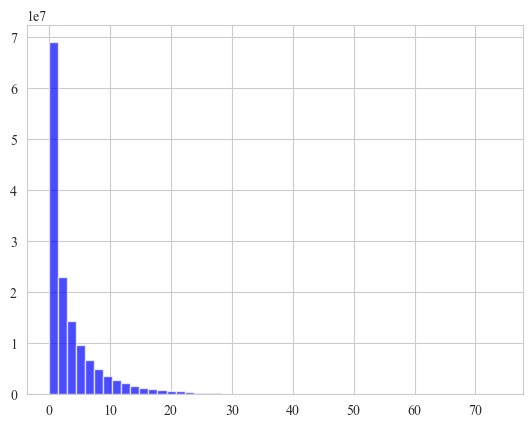

In [17]:
import pandas as pd
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Flatten the raster data to 1D
with rasterio.open(r"C:\Users\mun93\Downloads\DE_slope_WGS84.tif") as slope_src:
    data = slope_src.read(1)
    valid_data = data[(~np.isnan(data)) & (data != slope_src.nodata)]
    print(valid_data.min(), valid_data.max(), valid_data.mean())
    df2 = pd.DataFrame(valid_data, columns=['value2'])

    # Plot the histogram using Matplotlib
    plt.hist(valid_data, bins=50, color='blue', alpha=0.7, #range=(0, 90)
             )



Stats: Min=0.00°, Max=74.07°, Mean=3.57°


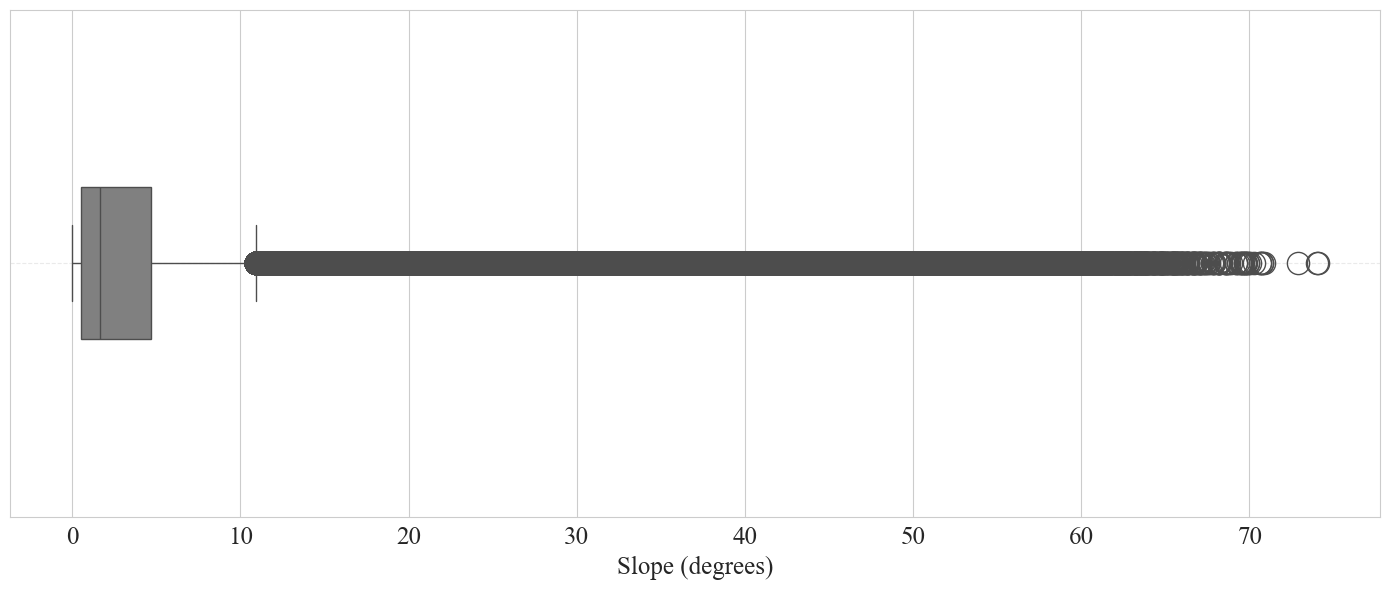

In [105]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'Times New Roman'
# Load and preprocess slope data
with rasterio.open(r"C:\Users\mun93\Downloads\DE_slope_WGS84.tif") as slope_src:
    data = slope_src.read(1)  # Read the first band
    valid_data = data[(~np.isnan(data)) & (data != slope_src.nodata)]  # Filter nodata/NaN
    print(f"Stats: Min={valid_data.min():.2f}°, Max={valid_data.max():.2f}°, Mean={valid_data.mean():.2f}°")

# Create a figure with two subplots
fig, ax = plt.subplots(1, 1, figsize=(14, 6))

# # --- Histogram ---
# sns.histplot(
#     x=valid_data,
#     bins=50,
#     color='blue',
#     alpha=0.7,
#     kde=True,
#     ax=ax1
# )
# ax1.set_title('Distribution of Slope Values in Germany', fontsize=14)
# ax1.set_xlabel('Slope (degrees)', fontsize=12)
# ax1.set_ylabel('Frequency', fontsize=12)
# ax1.grid(axis='y', linestyle='--', alpha=0.4)

# --- Box Plot ---
sns.boxplot(
    x=valid_data,
    color='grey',
    width=0.3,
    #ax=ax2,
    fliersize=16,
    orient='h',  # Horizontal box plot
    whis=1.5,  # Whiskers extend to 1.5 * IQR
    showfliers=True,

)
#ax.set_title('Box Plot of Slope Values', fontsize=14)
ax.set_xlabel('Slope (degrees)', fontsize=18)
ax.grid(axis='y', linestyle='--', alpha=0.4)
ax.tick_params(axis='x', labelsize=18)

# Adjust layout and display
plt.tight_layout()
plt.show()

In [30]:
count_in_range = np.sum((valid_data < 5) & (valid_data <= 90))
# Calculate percentage
percentage = (count_in_range / len(valid_data)) * 100

print(f"Percentage of data between 15-20: {percentage:.2f}%")


Percentage of data between 15-20: 76.58%


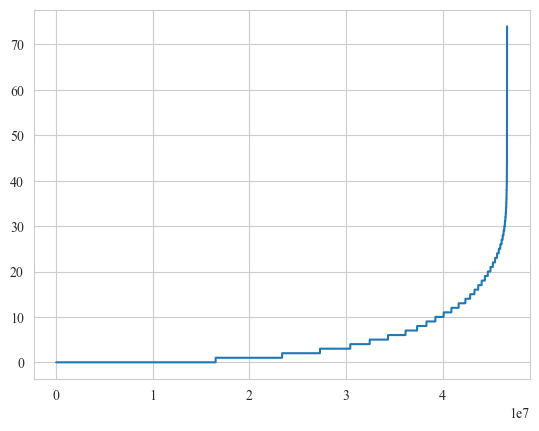

In [18]:

frame = pd.DataFrame(valid_data)
a = df2.value2.unique()
b = a.astype('int')
unique_vals_sorted = np.sort(b)
plt.plot(unique_vals_sorted)

Min slope (°): 0.0
Max slope (°): 74.072556
Mean slope (°): 3.5679045
Unique slope: [0.0000000e+00 6.8807807e-08 9.2145413e-08 ... 7.4003555e+01 7.4072556e+01
           nan]


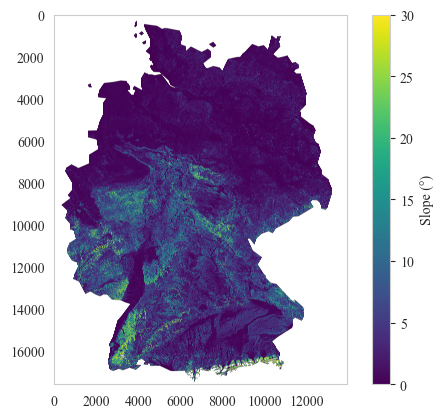

In [19]:
# Check slope stats
print("Min slope (°):", np.nanmin(slope_degrees))
print("Max slope (°):", np.nanmax(slope_degrees))
print("Mean slope (°):", np.nanmean(slope_degrees))
print("Unique slope:", np.unique(slope_degrees))

# Plot
import matplotlib.pyplot as plt
plt.imshow(slope_degrees, cmap="viridis", vmin=0, vmax=30)
plt.colorbar(label="Slope (°)")
plt.grid(False)
plt.show()

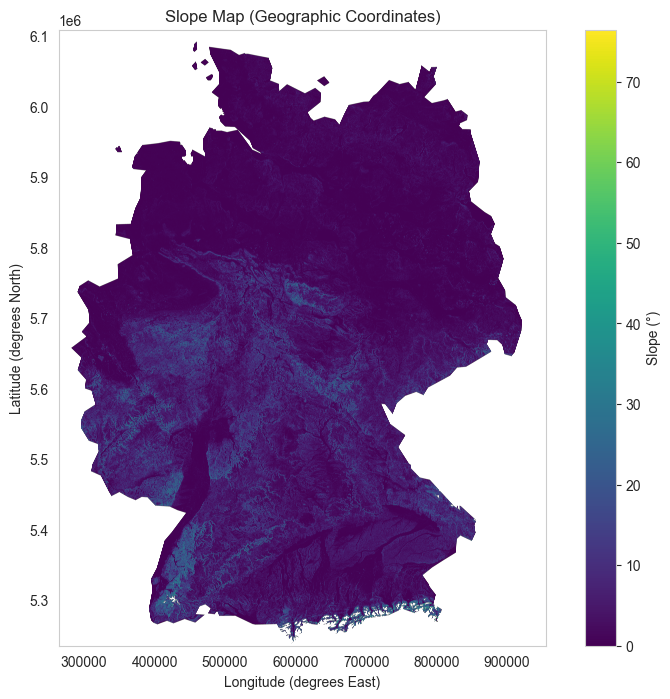

In [19]:
import rasterio
import matplotlib.pyplot as plt

with rasterio.open(r"C:\Users\mun93\Downloads\DE_slope_WGS84.tif") as src:
    data = src.read(1)
    transform = src.transform

    # Calculate geographic bounds from transform
    left, bottom = transform * (0, src.height)  # Lower-left corner
    right, top = transform * (src.width, 0)     # Upper-right corner
    extent = [left, right, bottom, top]         # [xmin, xmax, ymin, ymax]

    # Plot with geographic axes
    plt.figure(figsize=(10, 8))
    plt.imshow(data, extent=extent, cmap="viridis")
    plt.colorbar(label="Slope (°)")
    plt.xlabel("Longitude (degrees East)")
    plt.ylabel("Latitude (degrees North)")
    plt.title("Slope Map (Geographic Coordinates)")
    plt.grid(False)
    plt.show()

C:\Users\mun93\AppData\Local\Temp\ipykernel_20256\170488817.py:67: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  terrain_cmap = plt.cm.get_cmap('terrain')
C:\Users\mun93\anaconda3\envs\JupyterProject_3.10\lib\site-packages\matplotlib_scalebar\scalebar.py:457: UserWarning: Drawing scalebar on axes with unequal aspect ratio; either call ax.set_aspect(1) or suppress the warning with rotation='horizontal-only'.
  warnings.warn(


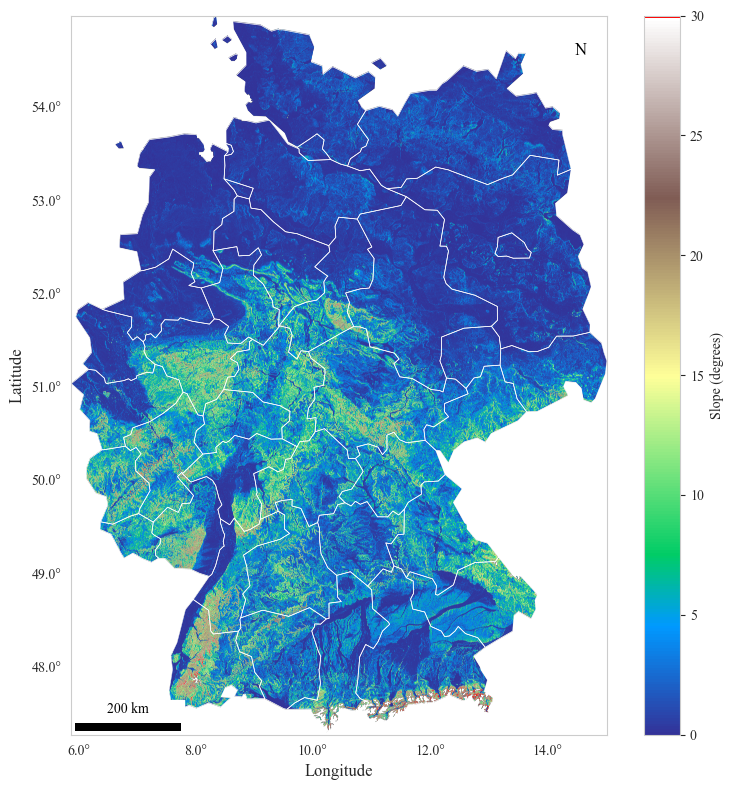

In [5]:
import rasterio
from rasterio.warp import calculate_default_transform, reproject, Resampling
from rasterio.mask import mask
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar
import matplotlib.ticker as mticker
import matplotlib.colors as mcolors
import os

plt.rcParams['font.family'] = 'Times New Roman'

# -------------------- INPUT FILES --------------------
raster_path = r"C:\Users\mun93\Downloads\DE_slope_WGS84.tif"
shapefile_path = r"C:\Users\mun93\Downloads\NUTS_RG_20M_2024_4326.shp\NUTS_RG_20M_2024_4326.shp"
reprojected_raster_path = os.path.splitext(raster_path)[0] + "_REPROJECTED.tif"

# -------------------- STEP 1: REPROJECT RASTER FROM EPSG:25832 TO EPSG:4326 --------------------
with rasterio.open(raster_path) as src:
    src_crs = src.crs  # should be EPSG:25832
    dst_crs = "EPSG:4326"

    transform, width, height = calculate_default_transform(
        src_crs, dst_crs, src.width, src.height, *src.bounds
    )

    profile = src.profile.copy()
    profile.update({
        'crs': dst_crs,
        'transform': transform,
        'width': width,
        'height': height,
        'nodata': src.nodata,
        'dtype': src.dtypes[0]
    })

    with rasterio.open(reprojected_raster_path, 'w', **profile) as dst:
        reproject(
            source=rasterio.band(src, 1),
            destination=rasterio.band(dst, 1),
            src_transform=src.transform,
            src_crs=src_crs,
            dst_transform=transform,
            dst_crs=dst_crs,
            resampling=Resampling.bilinear
        )

# -------------------- STEP 2: LOAD SHAPEFILE --------------------
germany_nuts2 = gpd.read_file(shapefile_path)
germany_nuts2 = germany_nuts2[
    (germany_nuts2['NUTS_ID'].str.startswith('DE')) &
    (germany_nuts2['LEVL_CODE'] == 2)
]

# -------------------- STEP 3: CLIP RASTER --------------------
with rasterio.open(reprojected_raster_path) as src:
    out_image, out_transform = mask(src, germany_nuts2.geometry, crop=True)
    out_image = np.ma.masked_equal(out_image, src.nodata)

# -------------------- STEP 4: PLOT --------------------
fig, ax = plt.subplots(figsize=(8, 8))
bounds = rasterio.transform.array_bounds(out_image.shape[1], out_image.shape[2], out_transform)
extent = [bounds[0], bounds[2], bounds[1], bounds[3]]

# Create a copy of the 'terrain' colormap
terrain_cmap = plt.cm.get_cmap('terrain')
norm = mcolors.Normalize(vmin=0, vmax=30)
colors = terrain_cmap(norm(np.linspace(0, 30, 256)))
# Add red for values >30
colors = np.vstack((colors, [1, 0, 0, 1]))  # RGBA for red
custom_cmap = mcolors.ListedColormap(colors)
img = ax.imshow(out_image[0], cmap=custom_cmap, extent=extent, norm=norm)
cbar = plt.colorbar(img, ax=ax, label='Slope (degrees)')

germany_nuts2.boundary.plot(ax=ax, color='white', linewidth=0.5)

scalebar = ScaleBar(111, "km", loc='lower left', scale_loc='top')
ax.add_artist(scalebar)

ax.annotate('N', xy=(0.95, 0.95), xycoords='axes fraction',
            fontsize=12, ha='center', va='center', color='black')

ax.set_xlabel("Longitude", fontsize=12)
ax.set_ylabel("Latitude", fontsize=12)
ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{x:.1f}°"))
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda y, _: f"{y:.1f}°"))

plt.tight_layout()
plt.grid(False)
plt.show()


## Reshape_Resolution of slope to PD

In [67]:
LC_tif = r"C:\Users\mun93\Downloads\wind_suitability_polygons_and_points_masked.tif"
sl_tif = r"C:\Users\mun93\Downloads\DE_slope_WGS84.tif"

# Load land cover
with rasterio.open(LC_tif) as lc_src:
    lc = lc_src.read(1)
    lc_meta = lc_src.meta

# Load wind power density
with rasterio.open(sl_tif) as sl_src:
    sl = sl_src.read(1)
    sl_meta = sl_src.meta

print(f"{lc_meta}\n")
print(sl_meta)
print("lc shape:", lc.shape, "| sl shape:", sl.shape)
print("lc transform:", lc_meta['transform'])
print("sl transform:", sl_meta['transform'])

from rasterio.warp import reproject, Resampling

# Reshape sl to match lc's grid
sl_aligned = np.empty_like(lc)  # Target shape
reproject(
    sl,  # Source data
    sl_aligned,  # Target array
    src_transform=sl_meta['transform'],
    dst_transform=lc_meta['transform'],
    src_crs=sl_meta['crs'],
    dst_crs=lc_meta['crs'],
    resampling=Resampling.bilinear  # Use 'bilinear' for continuous data
)




{'driver': 'GTiff', 'dtype': 'float32', 'nodata': nan, 'width': 3659, 'height': 3081, 'count': 1, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'), 'transform': Affine(0.002500000000000124, 0.0, 5.876572682193888,
       0.0, -0.002500000000000124, 54.97826874773588)}

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': nan, 'width': 13938, 'height': 17603, 'count': 1, 'crs': CRS.from_wkt('PROJCS["ETRS89 / UTM zone 32N",GEOGCS["ETRS89",DATUM["European_Terrestrial_Reference_System_1989",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6258"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4258"]],PROJECTI

(array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],
       shape=(3081, 3659), dtype=float32),
 Affine(0.002500000000000124, 0.0, 5.876572682193888,
        0.0, -0.002500000000000124, 54.97826874773588))

In [80]:
print(sl_aligned.mean())
slope_masked_data = np.where(sl_aligned <=6, 1, 0)
mw = rasterio.open(r"C:\Users\mun93\Downloads\wind_suitability_polygons_and_points_masked.tif").read(1)
results  = slope_masked_data * mw
print(np.nanmin(results), np.nanmax(results), np.nanmean(results))

with rasterio.open(r"C:\Users\mun93\Downloads\PD_LCPA_Slope_wind_suitability.tif", 'w', **lc_meta) as dst:
    dst.write(results, 1)


nan
0.0 1109.46142578125 477.1447643074711


[3 0 2 1]
EPSG:4326


,NUTS_ID,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,geometry
918,DE11,2,DE,Stuttgart,Stuttgart,NaN,NaN,NaN,"POLYGON ((9.79842 49.69492, 9.93554 49.5007, 1..."
919,DE12,2,DE,Karlsruhe,Karlsruhe,NaN,NaN,NaN,"POLYGON ((9.51528 49.47577, 9.60382 49.42658, ..."
920,DE13,2,DE,Freiburg,Freiburg,NaN,NaN,NaN,"POLYGON ((8.25952 48.38014, 8.30399 48.34909, ..."
921,DE14,2,DE,Tübingen,Tübingen,NaN,NaN,NaN,"POLYGON ((9.94407 48.63176, 10.23078 48.51051,..."
922,DE21,2,DE,Oberbayern,Oberbayern,NaN,NaN,NaN,"POLYGON ((11.51417 49.0465, 11.59931 48.9515, ..."
923,DE22,2,DE,Niederbayern,Niederbayern,NaN,NaN,NaN,"POLYGON ((13.83951 48.77161, 13.79611 48.7136,..."
924,DE23,2,DE,Oberpfalz,Oberpfalz,NaN,NaN,NaN,"POLYGON ((12.98429 49.32293, 13.17091 49.17358..."
925,DE24,2,DE,Oberfranken,Oberfranken,NaN,NaN,NaN,"POLYGON ((11.48157 50.43162, 11.60329 50.39877..."
926,DE25,2,DE,Mittelfranken,Mittelfranken,NaN,NaN,NaN,"POLYGON ((10.72811 49.77144, 10.81008 49.73905..."
927,DE26,2,DE,Unterfranken,Unterfranken,NaN,NaN,NaN,"POLYGON ((10.58655 50.32344, 10.61016 50.22792..."


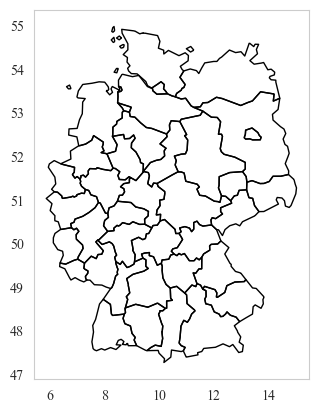

In [10]:
import geopandas as gpd
shpfile = r'C:\Users\mun93\Downloads\NUTS_RG_20M_2024_4326.shp\NUTS_RG_20M_2024_4326.shp'
DE_shape_file = gpd.read_file(shpfile)
print(DE_shape_file.LEVL_CODE.unique())
print(DE_shape_file.crs)

DE = DE_shape_file[(DE_shape_file['NUTS_ID'].str.contains('DE')) & (DE_shape_file['LEVL_CODE'] == 2)]
DE.plot(color='none', edgecolor='black')
#print(DE.boundary)
plt.grid(False)
DE

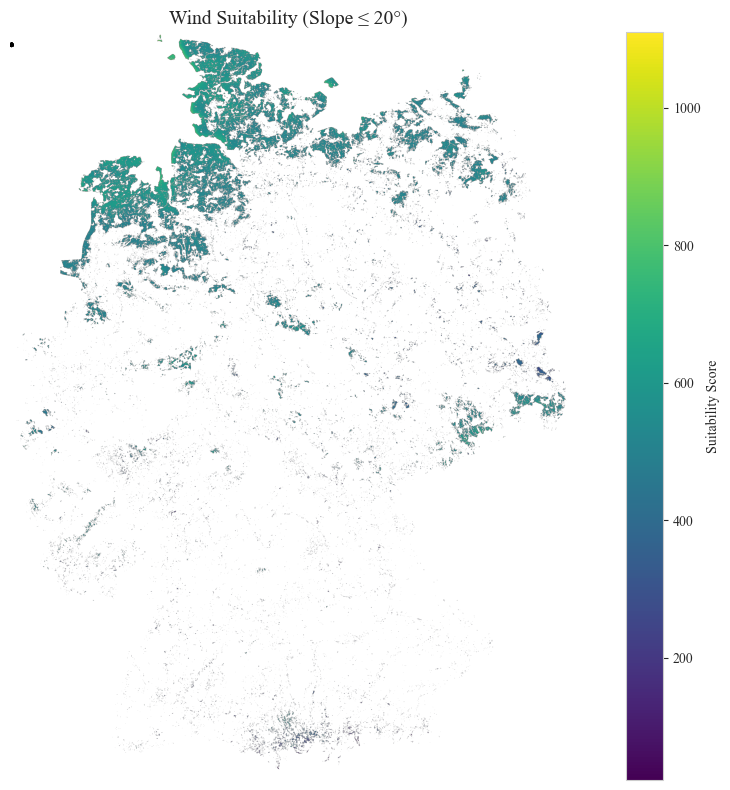

In [82]:
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np

# Load the raster and boundary
final_result = rasterio.open(r"C:\Users\mun93\Downloads\PD_LCPA_Slope_wind_suitability.tif").read(1)
with rasterio.open(r"C:\Users\mun93\Downloads\PD_LCPA_Slope_wind_suitability.tif") as src:
    raster_data = src.read(1)
    raster_crs = src.crs

DE = DE.to_crs(raster_crs)


# Create a masked array to hide NoData/NaN
masked_data = np.ma.masked_invalid(raster_data)  # Masks NaN automatically
# OR if NoData is a specific value (e.g., -9999):
masked_data = np.ma.masked_equal(raster_data, 0)

# Plot
fig, ax = plt.subplots(figsize=(12, 8))

# Show raster with transparency for NoData

im = ax.imshow(masked_data, cmap='viridis')
#DE = DE.to_crs(lc_src.crs)
DE.boundary.plot(ax=ax, edgecolor='black', linewidth=2)


# Customize plot
ax.set_title('Wind Suitability (Slope ≤ 20°)', fontsize=14)
plt.colorbar(im, ax=ax, label='Suitability Score')
ax.axis('off')  # Hide axes for a clean map
plt.tight_layout()
plt.show()

Raster bounds: BoundingBox(left=5.876572682193888, bottom=47.2757687477355, right=15.024072682194342, top=54.97826874773588)
Shapefile bounds: [ 5.87705568 47.27011403 15.02256627 54.97703126]


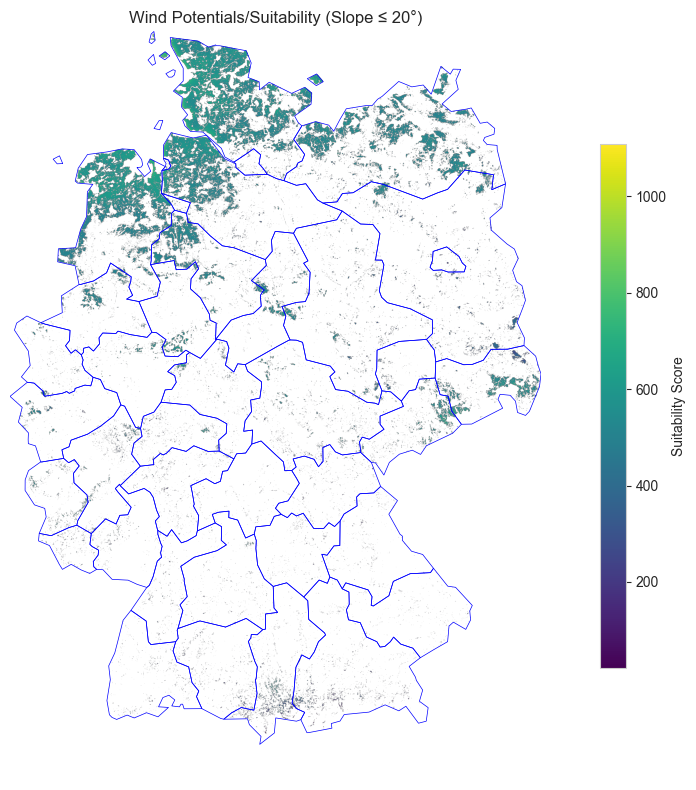

In [11]:
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np

# 1. Load the raster data
raster_path = r"C:\Users\mun93\Downloads\PD_LCPA_Slope_wind_suitability.tif"
with rasterio.open(raster_path) as src:
    raster_data = src.read(1)
    raster_crs = src.crs
    transform = src.transform
    bounds = src.bounds

# 2. Load and prepare the boundary shapefile (assuming DE is already loaded as GeoDataFrame)
# If you need to load it:
# DE = gpd.read_file(your_shapefile_path.shp)
DE = DE.to_crs(raster_crs)  # Ensure matching CRS

# 3. Create mask (adjust based on your NoData value)
masked_data = np.ma.masked_equal(raster_data, 0)  # Masking 0 values
# Alternative if using NaN: masked_data = np.ma.masked_invalid(raster_data)

# 4. Create figure
fig, ax = plt.subplots(figsize=(12, 8))

# 5. Plot raster with proper georeferencing
im = show(masked_data,
          ax=ax,
          cmap='viridis',
          transform=transform,
          extent=[bounds.left, bounds.right, bounds.bottom, bounds.top])

# 6. Plot boundary with high visibility
DE.boundary.plot(ax=ax,
                edgecolor='blue',
                linewidth=.5,
                linestyle='-')

# 7. Add colorbar and formatting
cbar = plt.colorbar(im.get_images()[0], ax=ax, shrink=0.7)
cbar.set_label('Suitability Score')

ax.set_title('Wind Potentials/Suitability (Slope ≤ 20°)', fontsize=12)
ax.axis('off')  # Hide axes

# 8. Verify bounds overlap (debugging)
print("Raster bounds:", bounds)
print("Shapefile bounds:", DE.total_bounds)

plt.tight_layout()
plt.show()

In [25]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import rasterio
from geopy.distance import geodesic
import math

# Constants
BETZ_LIMIT = 0.593  # Maximum theoretical efficiency
TURBINE_EFFICIENCY = 0.40 * 0.85 # Real-world turbine efficiency (35-45%), including BETZ_LIMIT
TURBINE_SPACING = 800  # meters between turbines (industry standard)
ROTOR_DIAMETER = 150  # meters (typical modern turbine)
ROTOR_AREA = math.pi * (ROTOR_DIAMETER/2)**2  # 17,671 m²

GERMANY_AREA_KM2 = 356888.69  # Total area of Germany
CAPACITY_FACTOR = 0.267    # 25% capacity factor for German onshore wind
HOURS_PER_YEAR = 8760

def calculate_wind_potential(raster_path):
    """Calculate realistic wind power potential from power density raster."""

    # 1. Load raster data
    with rasterio.open(raster_path) as src:
        power_density = src.read(1)  # Wind power density in W/m²
        crs = src.crs
        transform = src.transform
        nodata = src.nodata

    # 2. Calculate pixel area in m²
    if crs.is_projected:
        # Projected CRS (units in meters)
        pixel_area_m2 = abs(transform.a * transform.e)
        print(f"Pixel size: {transform.a:.1f}m x {abs(transform.e):.1f}m")
    else:
        # Geographic CRS (WGS84 in degrees)
        left, top = transform * (0, 0)
        right, bottom = transform * (1, 1)
        pixel_width_m = geodesic((top, left), (top, right)).meters
        pixel_height_m = geodesic((top, left), (bottom, left)).meters
        pixel_area_m2 = pixel_width_m * pixel_height_m
        print(f"Pixel size: ~{pixel_width_m:.1f}m x ~{pixel_height_m:.1f}m (geographic)")

    # 3. Mask NoData values
    valid_data = np.where(power_density == nodata, np.nan, power_density) if nodata is not None else power_density

    # 4. Apply turbine physics
    # a) Account for Betz limit and turbine efficiency
    extractable_density = valid_data * TURBINE_EFFICIENCY

    # b) Account for turbine spacing (only ~7% of area has turbines)
    turbine_area_per_pixel = TURBINE_SPACING**2  # 250,000 m² per turbine
    area_utilization = ROTOR_AREA / turbine_area_per_pixel  # ~0.07

    # c) Calculate actual power generation per pixel
    operational_power = extractable_density * area_utilization

    # 5. Calculate total power (W)
    total_power_W = np.nansum(operational_power * pixel_area_m2)
    total_power_GW = total_power_W / 1e9  # Convert to GW
    potential_installed_capacity = total_power_GW/CAPACITY_FACTOR

    # 6. Calculate annual energy (TWh)
    annual_energy_TWh = (potential_installed_capacity * CAPACITY_FACTOR * HOURS_PER_YEAR) / 1e3

    # 7. Calculate suitable area
    valid_pixels = np.count_nonzero(~np.isnan(valid_data) & (valid_data > 0))
    suitable_area_km2 = (valid_pixels * pixel_area_m2) / 1e6

    # 8. Print results with reality checks
    print("\n=== Results ===")
    print(f"Suitable area: {suitable_area_km2:,.0f} km² ({suitable_area_km2/GERMANY_AREA_KM2:.1%} of Germany)")
    print(f"Total installed capacity: {total_power_GW:,.0f} GW")
    print(f"Total potential installed capacity per year: {potential_installed_capacity:,.0f} GW")
    print(f"Annual energy potential: {annual_energy_TWh:,.0f} TWh/year (at {CAPACITY_FACTOR:.0%} CF)")

    # Compare to known values
    print("\n=== Validation ===")
    print(f"Fraunhofer IEE Estimate: 1,100-2,900 TWh/year")
    print(f"German Consumption (2023): ~500 TWh/year")

    return {
        'suitable_area_km2': suitable_area_km2,
        'total_power_GW': total_power_GW,
        'potential_installed_capacity_GW': potential_installed_capacity,
        'annual_energy_TWh': annual_energy_TWh
    }

# Run calculation
results = calculate_wind_potential(r"C:\Users\mun93\Downloads\PD_LCPA_Slope_wind_suitability.tif")

Pixel size: ~160.1m x ~278.3m (geographic)

=== Results ===
Suitable area: 25,403 km² (7.1% of Germany)
Total installed capacity: 124 GW
Total potential installed capacity per year: 464 GW
Annual energy potential: 1,086 TWh/year (at 27% CF)

=== Validation ===
Fraunhofer IEE Estimate: 1,100-2,900 TWh/year
German Consumption (2023): ~500 TWh/year


## grouping per NUTS2

In [2]:
import rasterio
import geopandas as gpd
import numpy as np
import math
from rasterio.mask import mask
from geopy.distance import geodesic

# Constants
BETZ_LIMIT = 0.593  # Maximum theoretical efficiency
TURBINE_EFFICIENCY = 0.40 * 0.85  # Real-world efficiency (Betz + mechanical losses)
TURBINE_SPACING = 800  # meters between turbines (industry standard)
ROTOR_DIAMETER = 150  # meters (typical modern turbine)
ROTOR_AREA = math.pi * (ROTOR_DIAMETER / 2)**2  # 17,671 m²

# Load NUTS1 regions for Germany
shpfile = r'C:\Users\mun93\Downloads\NUTS_RG_20M_2024_4326.shp\NUTS_RG_20M_2024_4326.shp'
DE_shape_file = gpd.read_file(shpfile)
DE = DE_shape_file[(DE_shape_file['NUTS_ID'].str.contains('DE')) & (DE_shape_file['LEVL_CODE'] == 2)]
gdf = DE.copy()

# Load raster
with rasterio.open(r"C:\Users\mun93\Downloads\PD_LCPA_Slope_wind_suitability.tif") as src:
    crs = src.crs
    transform = src.transform
    gdf = gdf.to_crs(src.crs)  # Ensure CRS match
    transform = src.transform

    if crs.is_projected:
        # Projected CRS (units in meters)
        pixel_area_m2 = abs(transform.a * transform.e)
        print(f"Pixel size: {transform.a:.1f}m x {abs(transform.e):.1f}m")
    else:
        # Geographic CRS (WGS84 in degrees)
        left, top = transform * (0, 0)
        right, bottom = transform * (1, 1)
        pixel_width_m = geodesic((top, left), (top, right)).meters
        pixel_height_m = geodesic((top, left), (bottom, left)).meters
        pixel_area_m2 = pixel_width_m * pixel_height_m
        print(f"Pixel size: ~{pixel_width_m:.1f}m x ~{pixel_height_m:.1f}m (geographic)")


    results = []
    for idx, row in gdf.iterrows():
        geom = [row.geometry.__geo_interface__]

        # Clip raster to the region
        out_image, out_transform = mask(src, geom, crop=True, nodata=np.nan)
        valid_data = out_image[0]  # Remove extra dimension

        # 1. Apply turbine efficiency (Betz + mechanical losses)
        extractable_density = valid_data * TURBINE_EFFICIENCY  # W/m²

        # 2. Account for turbine spacing (only ~7% of area has turbines)
        turbine_area_per_pixel = TURBINE_SPACING**2  # 640,000 m² per turbine
        area_utilization = ROTOR_AREA / turbine_area_per_pixel  # ~0.0276 (2.76% utilization)

        # 3. Calculate actual power generation per pixel (W)
        operational_power = extractable_density * area_utilization

        # 4. Sum total power for the region and convert to GW
        total_power_W = np.nansum(operational_power * pixel_area_m2)  # Total Watts
        total_power_TWh = total_power_W *8760/ 1e12  # Convert to Gigawatts
        total_power_TWh = total_power_TWh.round(1)
        results.append({
            "NUTS1_ID": row.NUTS_ID,
            "Total_Power_TWh": total_power_TWh,
            "Pixel_Area_m2": pixel_area_m2  # For verification
        })

# Save results
import pandas as pd
df = pd.DataFrame(results)
df['Total_H2_Mt'] = df['Total_Power_TWh'] * 0.70 / 39.39
df
#df.to_csv("wind_power_gw_by_nuts1.csv", index=False)
#print("Done! Results saved to wind_power_gw_by_nuts1.csv")

Pixel size: ~160.1m x ~278.3m (geographic)


,NUTS1_ID,Total_Power_TWh,Pixel_Area_m2,Total_H2_Mt
0,DE11,1.400000,44549.219472,0.024879
1,DE12,1.000000,44549.219472,0.017771
2,DE13,1.100000,44549.219472,0.019548
3,DE14,2.400000,44549.219472,0.042650
4,DE21,5.200000,44549.219472,0.092409
5,DE22,0.500000,44549.219472,0.008886
6,DE23,0.700000,44549.219472,0.012440
7,DE24,1.300000,44549.219472,0.023102
8,DE25,0.800000,44549.219472,0.014217
9,DE26,0.500000,44549.219472,0.008886


In [3]:
print(df.Pixel_Area_m2.mean())
print(df.Total_Power_TWh.sum())
print(df.Total_H2_Mt.sum())

44549.21947213122
1086.3
19.304646


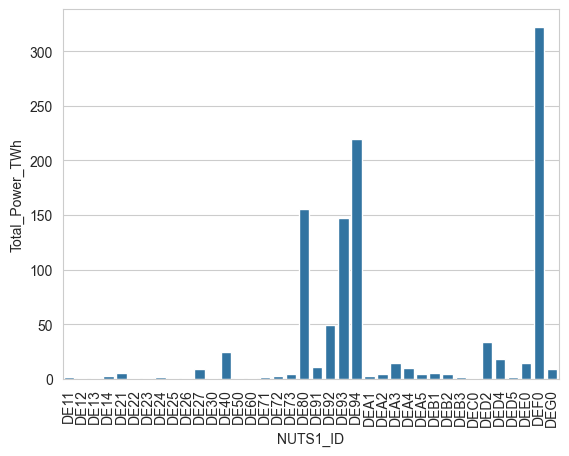

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x='NUTS1_ID', y='Total_Power_TWh', data=df)
plt.xticks(rotation=90);

In [30]:
pip install adjustText

Note: you may need to restart the kernel to use updated packages.


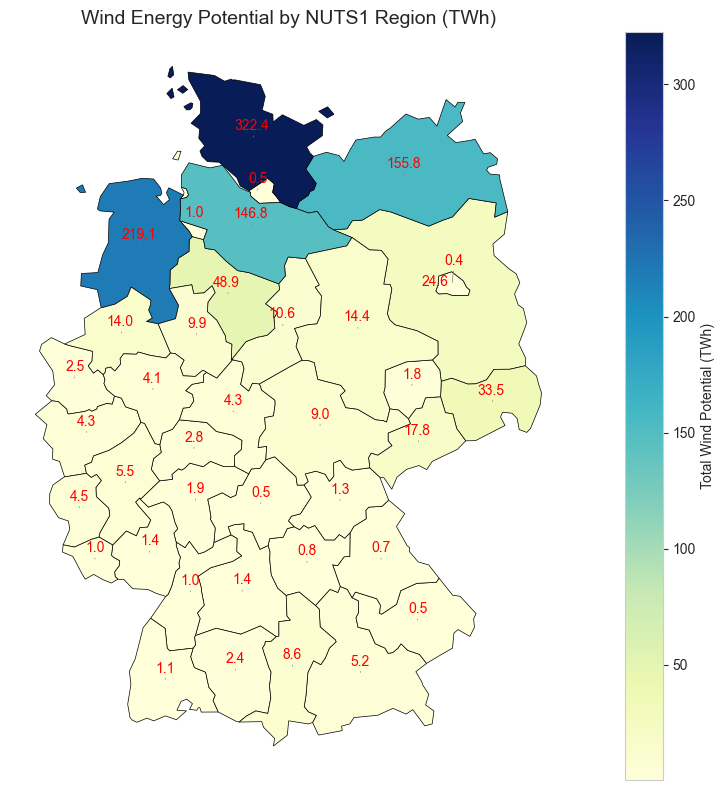

In [9]:
import geopandas as gpd
import matplotlib.pyplot as plt
from adjustText import adjust_text

# Load the shapefile and merge with your results
gdf = DE.copy()  # Ensure this has NUTS1 IDs
gdf = gdf.merge(df, left_on="NUTS_ID", right_on="NUTS1_ID", how="left")  # Replace "NUTS1_ID" with your actual column name

# Create the plot
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Plot the regions colored by total potential
gdf.plot(
    column="Total_Power_TWh",
    cmap="YlGnBu",  # Color scale (e.g., "viridis", "Blues")
    legend=True,
    ax=ax,
    edgecolor="black",
    linewidth=0.5,
    legend_kwds={"label": "Total Wind Potential (TWh)"}
)

# Customize the plot
ax.set_title("Wind Energy Potential by NUTS1 Region (TWh)", fontsize=14)
ax.set_axis_off()  # Hide axes for clarity

# Add region labels (optional)
texts = []
for idx, row in gdf.iterrows():
    centroid = row.geometry.centroid
    texts.append(
        ax.annotate(
            text=f"{row['Total_Power_TWh']:.1f}",  # Replace with region name if needed
            xy=(centroid.x, centroid.y),
            ha="center",
            fontsize=10,
            color="red",
        )
    )

# Adjust text to prevent overlap
adjust_text(texts, ax=ax, arrowprops=dict(arrowstyle='-', color='gray', lw=0.5))

plt.tight_layout()
#plt.savefig("wind_potential_map.png", dpi=300)  # Save as high-res image
plt.show()

## For the Report 2

C:\Users\mun93\anaconda3\envs\JupyterProject_3.10\lib\site-packages\matplotlib_scalebar\scalebar.py:457: UserWarning: Drawing scalebar on axes with unequal aspect ratio; either call ax.set_aspect(1) or suppress the warning with rotation='horizontal-only'.
  warnings.warn(


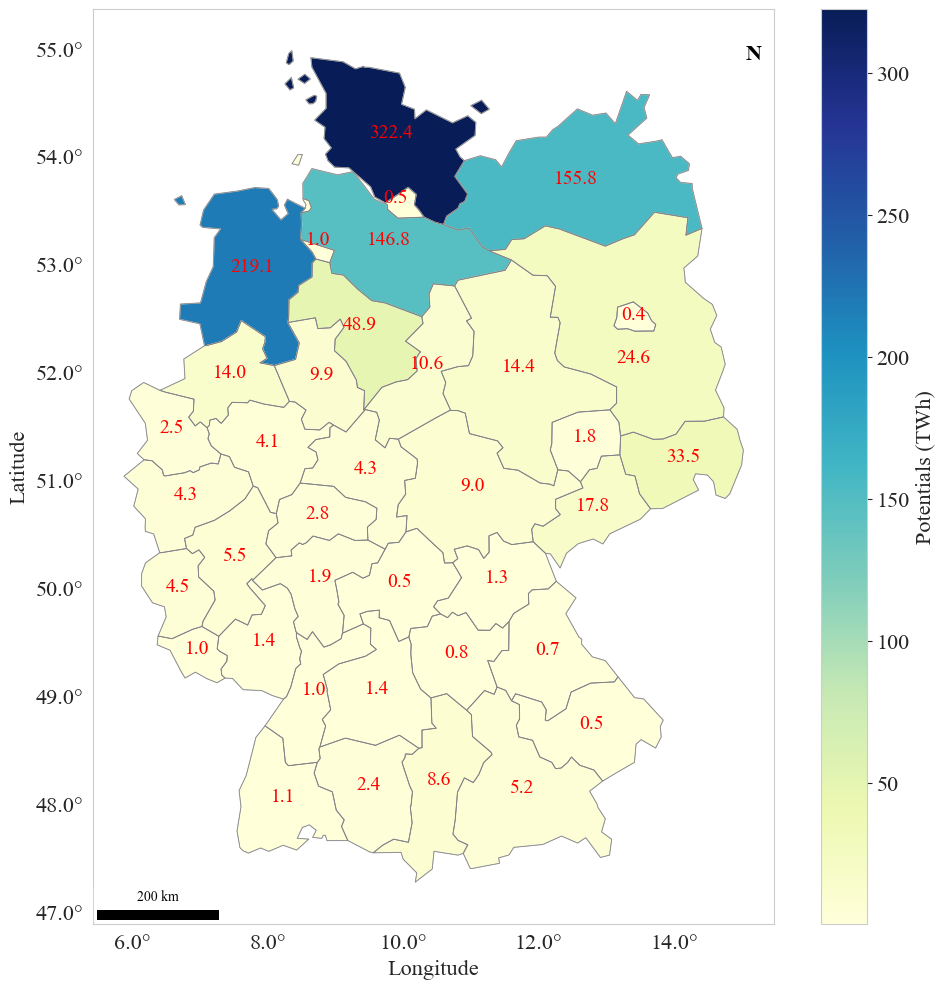

In [10]:
import matplotlib as plt
import matplotlib.ticker as mticker
from matplotlib_scalebar.scalebar import ScaleBar
import matplotlib.cm as cm
import matplotlib.colors as colors
# Merge the percentage drop data back into the GeoDataFrame


DE2_with_drop = gdf.copy()


plt.rcParams['font.family'] = 'Times New Roman'

# Plot the percentage drop on the map
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
DE2_with_drop.plot(column="Total_Power_TWh",
                   cmap="YlGnBu",
                   linewidth=0.8,
                   ax=ax,
                   edgecolor="0.8",

                   #legend=True,
                   #legend_kwds={'label': "% Drop in Wind Energy Potential",
                                #'orientation': "vertical"}
)

#ax.set_title("Impact of Land Use Constraints on Wind Energy Potential (NUTS-2 Regions)", fontsize=14)

# Add annotations
for i, row in DE2_with_drop.iterrows():
    if row['NUTS_ID'] == 'DE40':
        xytext=(0, -30)
    else:
        xytext=(0, 0)

    plt.annotate(
        text=f"{row['Total_Power_TWh']:.1f}",
        xy=row.geometry.centroid.coords[0],
        ha='center',
        fontsize=14,
        xytext=xytext,  # Optional: Offset for text
        textcoords='offset points',
        color="red"
    )
DE.boundary.plot(ax=ax, color='grey', linewidth=0.5)
# Add labels
ax.set_xlabel("Longitude", fontsize=16)
ax.set_ylabel("Latitude", fontsize=16)
ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{x:.1f}°"))
ax.tick_params(axis='x', labelsize=16)
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda y, _: f"{y:.1f}°"))
ax.tick_params(axis='y', labelsize=16)
    # Add north arrow
ax.annotate('N', xy=(0.97, 0.95), xycoords='axes fraction',
            fontsize=16, ha='center', va='center', color='black', fontweight='bold')

scalebar = ScaleBar(111, "km", loc='lower left', scale_loc='top'#, length_fraction=0.25, border_pad=1, pad=0.5, frameon=None
                    )  # scale 1 = 1 unit in data CRS
ax.add_artist(scalebar)

# Normalize based on your data
norm = colors.Normalize(vmin=DE2_with_drop["Total_Power_TWh"].min(),
                        vmax=DE2_with_drop["Total_Power_TWh"].max())
cmap = plt.cm.YlGnBu

# Create ScalarMappable
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm._A = []  # This is needed to avoid an error

# Add colorbar to the figure
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label("Potentials (TWh)", fontsize=16)
cbar.ax.tick_params(labelsize=16)

ax.axis('on')
plt.grid(False)
plt.tight_layout()
plt.show()


## to H2

C:\Users\mun93\anaconda3\envs\JupyterProject_3.10\lib\site-packages\matplotlib_scalebar\scalebar.py:457: UserWarning: Drawing scalebar on axes with unequal aspect ratio; either call ax.set_aspect(1) or suppress the warning with rotation='horizontal-only'.
  warnings.warn(


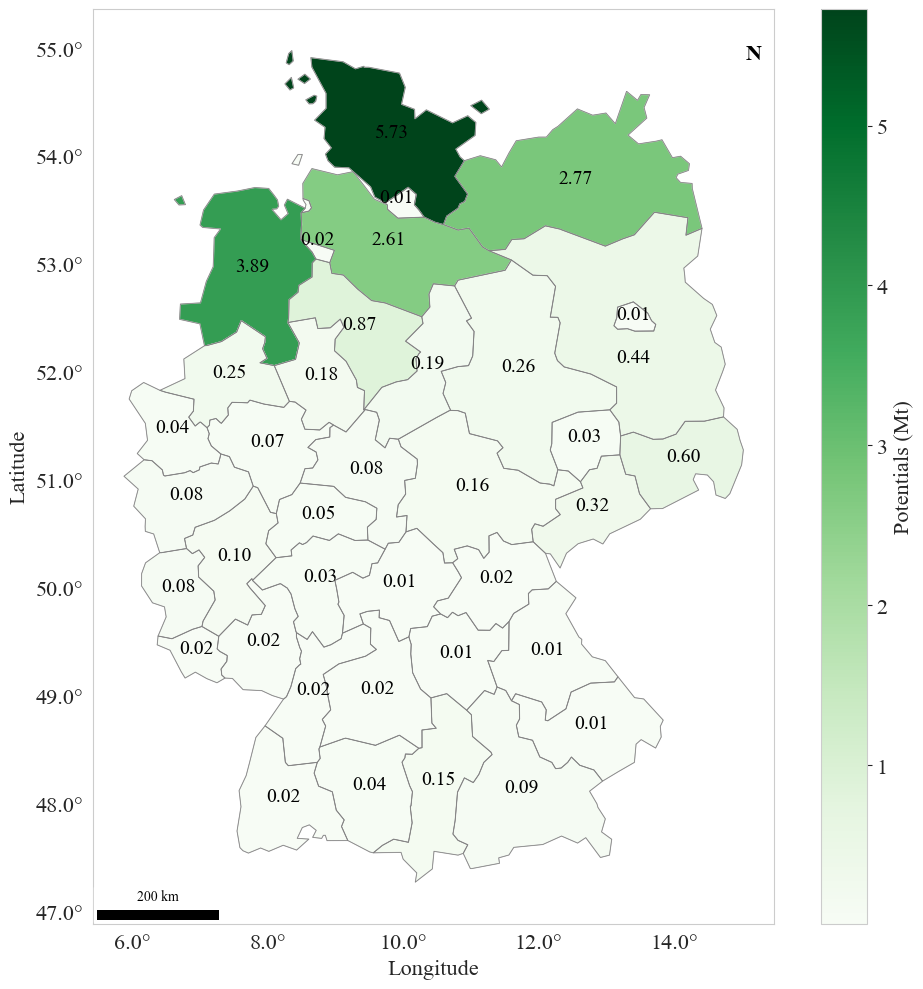

In [22]:
import matplotlib as plt
import matplotlib.ticker as mticker
from matplotlib_scalebar.scalebar import ScaleBar
import matplotlib.cm as cm
import matplotlib.colors as colors
# Merge the percentage drop data back into the GeoDataFrame


DE2_with_drop = gdf.copy()


plt.rcParams['font.family'] = 'Times New Roman'

# Plot the percentage drop on the map
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
DE2_with_drop.plot(column="Total_H2_Mt",
                   cmap="Greens",
                   linewidth=0.8,
                   ax=ax,
                   edgecolor="0.8",

                   #legend=True,
                   #legend_kwds={'label': "% Drop in Wind Energy Potential",
                                #'orientation': "vertical"}
)

#ax.set_title("Impact of Land Use Constraints on Wind Energy Potential (NUTS-2 Regions)", fontsize=14)

# Add annotations
for i, row in DE2_with_drop.iterrows():
    if row['NUTS_ID'] == 'DE40':
        xytext=(0, -30)
    else:
        xytext=(0, 0)

    plt.annotate(
        text=f"{row['Total_H2_Mt']:.2f}",
        xy=row.geometry.centroid.coords[0],
        ha='center',
        fontsize=14,
        xytext=xytext,  # Optional: Offset for text
        textcoords='offset points',
        color="black"
    )
DE.boundary.plot(ax=ax, color='grey', linewidth=0.5)
# Add labels
ax.set_xlabel("Longitude", fontsize=16)
ax.set_ylabel("Latitude", fontsize=16)
ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{x:.1f}°"))
ax.tick_params(axis='x', labelsize=16)
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda y, _: f"{y:.1f}°"))
ax.tick_params(axis='y', labelsize=16)
    # Add north arrow
ax.annotate('N', xy=(0.97, 0.95), xycoords='axes fraction',
            fontsize=16, ha='center', va='center', color='black', fontweight='bold')

scalebar = ScaleBar(111, "km", loc='lower left', scale_loc='top'#, length_fraction=0.25, border_pad=1, pad=0.5, frameon=None
                    )  # scale 1 = 1 unit in data CRS
ax.add_artist(scalebar)
# Normalize based on your data
norm = colors.Normalize(vmin=DE2_with_drop["Total_H2_Mt"].min(),
                        vmax=DE2_with_drop["Total_H2_Mt"].max())
cmap = plt.cm.Greens

# Create ScalarMappable
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm._A = []  # This is needed to avoid an error

# Add colorbar to the figure
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label("Potentials (Mt)", fontsize=16)
cbar.ax.tick_params(labelsize=16)

ax.axis('on')
plt.grid(False)
plt.tight_layout()
plt.show()
